# Example to plot maps using custom helper functions

We start by importing the necessary libraries

In [1]:
from astropy.nddata import CCDData
import matplotlib.pyplot as plt
from pathlib import Path

# from astropy.nddata import CCDData
# from astropy.table import Table
# import astropy.units as u
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# from pathlib import Path

from madcubapy.io import MadcubaMap
from madcubapy.visualization import add_wcs_axes
from madcubapy.visualization import add_manual_wcs_axes
from madcubapy.visualization import append_colorbar
from madcubapy.visualization import add_colorbar
from madcubapy.visualization import parse_clabel

We read the map file

In [2]:
# Create the MadcubaMap object
data_folder = Path("../data")
madcuba_map = MadcubaMap.read(data_folder/"IRAS16293_SO_2-1_moment0_madcuba.fits")
ccddata_map = MadcubaMap.read(data_folder/"IRAS16293_SO_2-1_moment0_madcuba.fits")

FILNAM0 Import File                                                              [astropy.io.fits.card]
SPECMOD Import File                                                              [astropy.io.fits.card]
SPWNAM0 Import File                                                              [astropy.io.fits.card]
FILNAM0 Import File                                                              [astropy.io.fits.card]
SPECMOD Import File                                                              [astropy.io.fits.card]
SPWNAM0 Import File                                                              [astropy.io.fits.card]
keyword looks very much like CUNITia but isn't. [astropy.wcs.wcs]
FILNAM0 Import File                                                              [astropy.io.fits.card]
SPECMOD Import File                                                              [astropy.io.fits.card]
SPWNAM0 Import File                                                              [astropy.io.fits.card

## Plot a map easily with `add_wcs_axes`

To use this function, we first need to create an empty figure, and pass it as an argument alongside the `MadcubaMap` or `CCDData` object to plot.

This function adds an axis using the projection stored in the `WCS` object of the map object (`MadcubaMap` or `CCDData`), yielding the `WCSAxes` object and `matplotlib.image.AxesImage`.

This function behaves the same way as `matplotlib.figure.Figure.add_subplot()`. The arguments are three integers (*nrows*, *ncols*, *index*). The subplot will take the index position on a grid with *nrows* rows and *ncols* columns. *index* starts at 1 in the upper left corner and increases to the right.

We can also set additional arguments that will be pased to `matplotlib.pyploy.imshow()` such as *cmap*, *vmin*, *vmax*, *norm*, and many others.

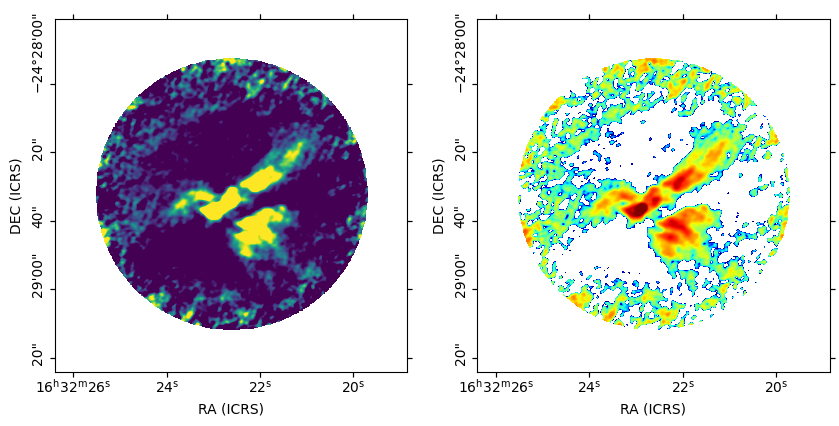

In [3]:
# Create empty figure
fig = plt.figure(figsize=(10,5))
# Add as many WCS axes objects as desired. We can pass kwargs to imshow()
ax1, img1 = add_wcs_axes(fig, 1, 2, 1, fitsmap=madcuba_map, vmin=0, vmax=100)
ax2, img2 = add_wcs_axes(fig, 1, 2, 2, fitsmap=madcuba_map, cmap='jet',
                         vmin=1, vmax=500, norm='log')

plt.show()

### Manual version: `add_manual_wcs_axes`

There is also a manual version of this function that creates the WCSAxes object and positions its lower-left corner at the selected figure coordinates and with a set width and height: *left*, *bottom*, *width*, *height*.

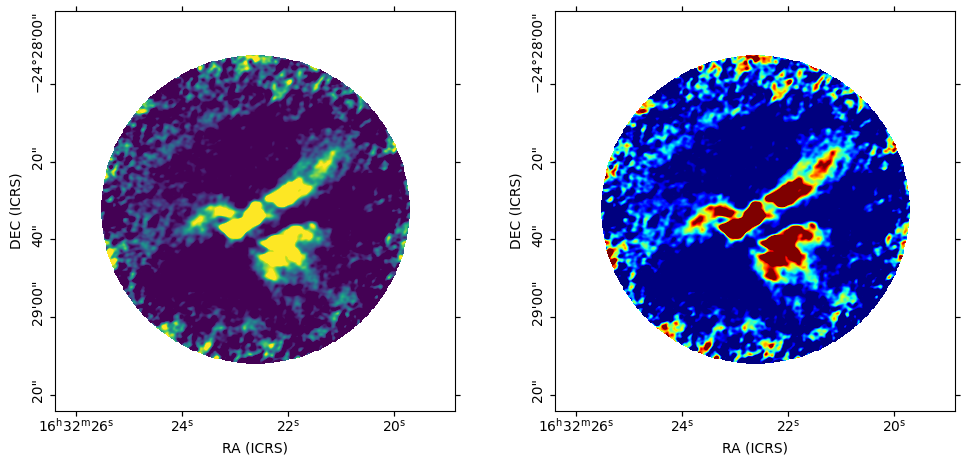

In [4]:
fig = plt.figure(figsize=(10,5))
ax1, img1 = add_manual_wcs_axes(fig, 0, 0, 0.4, 1, fitsmap=madcuba_map,
                              vmin=0, vmax=100)
ax2, img2 = add_manual_wcs_axes(fig, 0.5, 0, 0.4, 1, fitsmap=madcuba_map,
                                cmap='jet', vmin=0, vmax=100)

plt.show()

## Add colorbars

We can add a colorbar by using the `append_colorbar` or `add_colorbar` fuctions.

- `append_colorbar` adds a colorbar to one side of the main axes object, which is resized to accomodate the colorbar inside the space it was taking. The colorbar axes will always maintain the width that was set in the beggining, regardless of a change in the map size later (like resizing the window).

- `add_colorbar` adds a colorbar at a location relative to the main axes. This version does not resize the main axes and adds the cbar axes right where it is told, overlapping with anything that could be there before. The colorbar maintains the relative width relative to the map if it changes size later.

By default this functions parses the units from the map object if found, and sets the label acoordingly.

Both functions accept a number of additional parameters that are passed to `matplotlib.Figure.colorbar()`. With this we can set custom ticks, a custom label, etc.

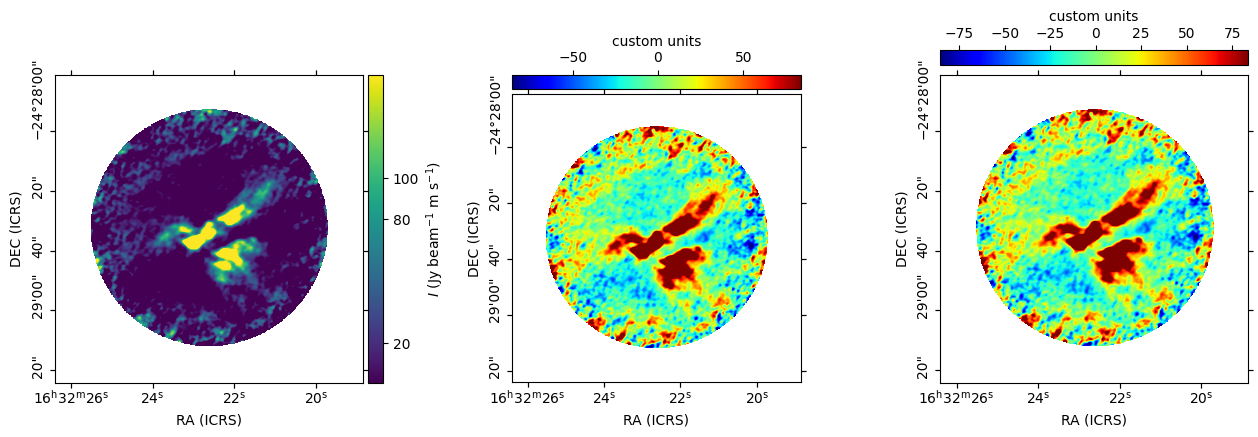

In [5]:
fig = plt.figure(figsize=(16,4))
ax1, img1 = add_wcs_axes(fig, 1, 3, 1, fitsmap=madcuba_map, vmin=20, vmax=100)
ax2, img2 = add_wcs_axes(fig, 1, 3, 2, fitsmap=madcuba_map,
                         use_std=True, cmap='jet')
ax3, img3 = add_wcs_axes(fig, 1, 3, 3, fitsmap=madcuba_map,
                         use_std=True, cmap='jet')

# Append a colorbar passing a custom ticks argument
cbar1 = append_colorbar(ax=ax1, ticks=[20, 80, 100]) # Test use ticks kwarg
img1.set_clim(vmin=1, vmax=150)
# Append a colorbar to the top of the axes
cbar2 = append_colorbar(ax=ax2, location='top', label='custom units')
# Add a colororbar on top of the axces
cbar3 = add_colorbar(ax=ax3, location='top', label='custom units')

plt.show()

As we can see, the map in the middle (set with `append_colorbar`) has been resized to accomodate the colorbar on top of it using the same space as the map on the left, while the map on the right (set with `add_colorbar`) places the colorbarbar on new space on top of it withour resizing the axes.

## Using the functions with CCDData objects

The functions can also be used with astropy's `CCDData` objects.

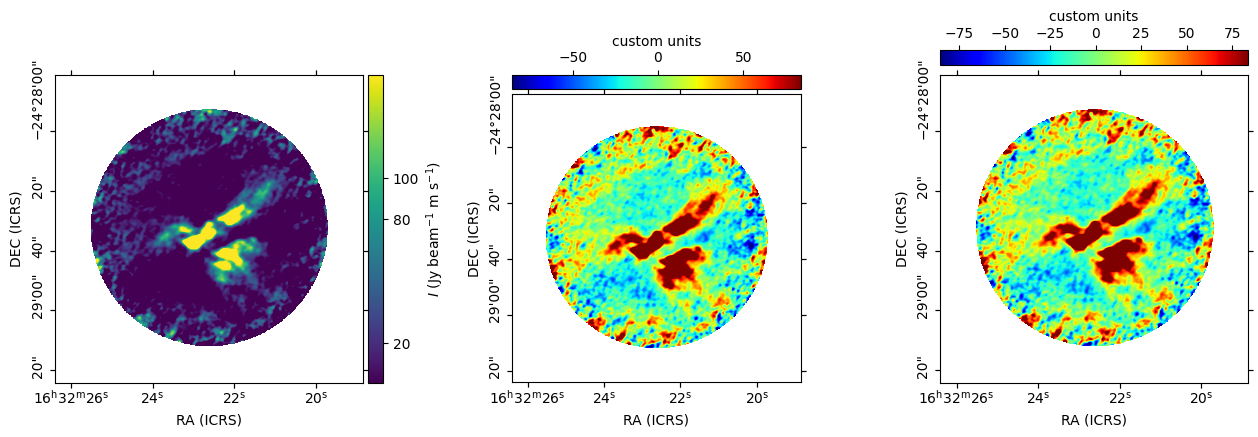

In [6]:
# Copy of the last figure using a CCDData object



fig = plt.figure(figsize=(16,4))
ax1, img1 = add_wcs_axes(fig, 1, 3, 1, fitsmap=ccddata_map, vmin=20, vmax=100)
ax2, img2 = add_wcs_axes(fig, 1, 3, 2, fitsmap=ccddata_map,
                         use_std=True, cmap='jet')
ax3, img3 = add_wcs_axes(fig, 1, 3, 3, fitsmap=ccddata_map,
                         use_std=True, cmap='jet')

# Append a colorbar passing a custom ticks argument
cbar1 = append_colorbar(ax=ax1, ticks=[20, 80, 100]) # Test use ticks kwarg
img1.set_clim(vmin=1, vmax=150)
# Append a colorbar to the top of the axes
cbar2 = append_colorbar(ax=ax2, location='top', label='custom units')
# Add a colororbar on top of the axces
cbar3 = add_colorbar(ax=ax3, location='top', label='custom units')

plt.show()